In [78]:
using Revise

using LinearAlgebra
using PyPlot
import TensorCrossInterpolation as TCI
using QuanticsTCI
using ITensors

In [79]:
absgaussf(x) = exp(-abs(x) / 2)

a, b = -12, 12
nquantics = 12
ndiscretization = 2^nquantics
xvals = range(a, b; length=ndiscretization)
step = div(ndiscretization, 256)


16

In [141]:
f(q) = absgaussf(xvals[quantics_to_index(q)[1]])
firstpivot = #TCI.optfirstpivot(f, fill(2, nquantics))
print(firstpivot)
time = @elapsed tci, ranks, errors = TCI.crossinterpolate(
    Float64,
    f,
    fill(2, nquantics),
    firstpivot,
    tolerance=1e-12,
    additionalpivots=[[fill(2, nquantics-1)..., 1]],
    maxiter=3
)

[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

0.213448792

In [139]:
absgauss = zeros(Float64, fill(2, nquantics)...)

for i in 1:ndiscretization
    absgauss[index_to_quantics(i, nquantics)...] = absgaussf(xvals[i])
end

siteindices = [Index(2, "site") for _ in 1:nquantics]
absgausstensor = ITensor(absgauss, siteindices)
mps = MPS(absgausstensor, siteindices, cutoff=1e-8)

MPS
[1] ((dim=2|id=317|"site"), (dim=2|id=730|"Link,n=1"))
[2] ((dim=2|id=730|"Link,n=1"), (dim=2|id=437|"site"), (dim=2|id=911|"Link,n=2"))
[3] ((dim=2|id=911|"Link,n=2"), (dim=2|id=53|"site"), (dim=2|id=517|"Link,n=3"))
[4] ((dim=2|id=517|"Link,n=3"), (dim=2|id=229|"site"), (dim=2|id=180|"Link,n=4"))
[5] ((dim=2|id=180|"Link,n=4"), (dim=2|id=356|"site"), (dim=2|id=335|"Link,n=5"))
[6] ((dim=2|id=335|"Link,n=5"), (dim=2|id=190|"site"), (dim=2|id=49|"Link,n=6"))
[7] ((dim=2|id=49|"Link,n=6"), (dim=2|id=115|"site"), (dim=2|id=95|"Link,n=7"))
[8] ((dim=2|id=95|"Link,n=7"), (dim=2|id=230|"site"), (dim=2|id=830|"Link,n=8"))
[9] ((dim=2|id=830|"Link,n=8"), (dim=2|id=371|"site"), (dim=2|id=974|"Link,n=9"))
[10] ((dim=2|id=974|"Link,n=9"), (dim=2|id=407|"site"), (dim=2|id=598|"Link,n=10"))
[11] ((dim=2|id=598|"Link,n=10"), (dim=2|id=901|"site"), (dim=2|id=80|"Link,n=11"))
[12] ((dim=2|id=80|"Link,n=11"), (dim=2|id=51|"site"))


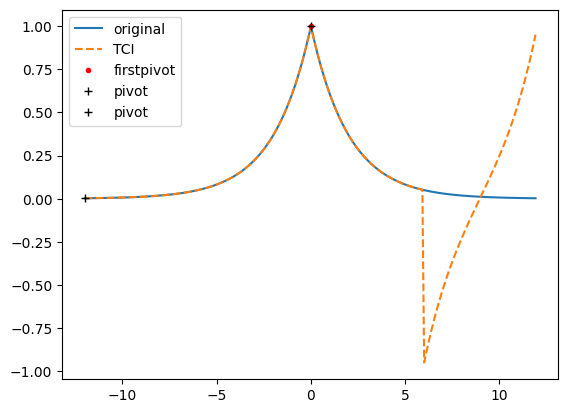

PyObject <matplotlib.legend.Legend object at 0x2afbb6940>

In [140]:
backconv = Array(absgausstensor, siteindices...)
tenseval = [backconv[index_to_quantics(i, nquantics)...] for i in 1:step:ndiscretization]
arreval = [absgauss[index_to_quantics(i, nquantics)...] for i in 1:step:ndiscretization]
mpseval = [evaluate_mps(mps, siteinds(mps), index_to_quantics(i, nquantics)) for i in 1:step:ndiscretization]
tcieval = [TCI.evaluate(tci, index_to_quantics(i, nquantics)) for i in 1:step:ndiscretization]
original = [absgaussf(xvals[quantics_to_index(index_to_quantics(i, nquantics))[1]]) for i in 1:step:ndiscretization]
plot(xvals[1:step:ndiscretization], original, label="original")
#plot(xvals[1:step:ndiscretization], arreval, label="array")
#plot(xvals[1:step:ndiscretization], tenseval, "--", label="tensor")
plot(xvals[1:step:ndiscretization], tcieval, "--", label="TCI")
#plot(xvals[1:step:ndiscretization], mpseval, ":", label="Itensor MPS (SVD)")


plot([xvals[quantics_to_index(firstpivot)[1]]], [f(firstpivot)], "r.", label="firstpivot")
            
for pivot in tci.Jset[1].fromint
    plot([xvals[quantics_to_index(vcat(pivot, [1]))[1]]], [f(vcat(pivot, [1]))], "k+", label="pivot")
end

#plot([xvals[quantics_to_index(a)[1]] for a in additionalpivots], [f(a) for a in additionalpivots], "k.")
            
legend()

In [137]:
tci.Jset[1].fromint

2-element Vector{Vector{Int64}}:
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]